# Mapa de calor, Densidad 2D y Hexbin

## Importar librerías requeridas

Primero es necesario importar los módulos necesarios para crear este tipo de visualización.
En este caso necesitamos tres módulos.

In [19]:
# Importar el módulo seaborn abreviado a sns
import seaborn as sns

# Importar el módulo pyploy de matplotlib abreviado a plt
import matplotlib.pyplot as plt

# Importar el módulo pandas abreviado a pd
import pandas as pd

import numpy as np

# Cargar *dataset*

Este *dataset* contiene la cantidad de pasajeros que cierta aerolínea atendió en distintos vuelos a lo largo de su historia por año y mes desde 1949 hasta 1960.

In [2]:
# Utilizar la función read_csv para cargar el dataset
# y función pivot para indexar el dataset en el formato de matriz.
dataset_vuelos = pd.read_csv("flights.csv").pivot(index="year", columns="month", values="passengers")
dataset_vuelos

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


## Mapa de calor

Para la creación de mapas de calor, `seaborn` provee la función `sns.heatmap` que recibe datos rectangulares de donde infiere las columnas y filas. Un *dataset* indexado como el anterior puede ser recibido directamente.

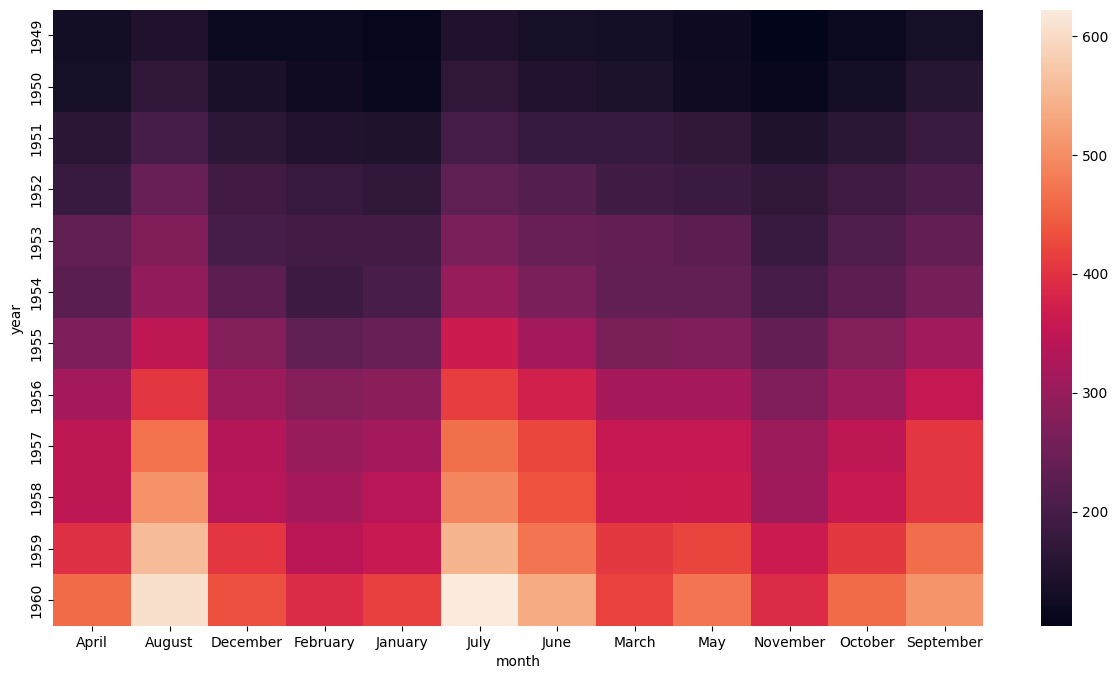

In [3]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
ax = sns.heatmap(dataset_vuelos)

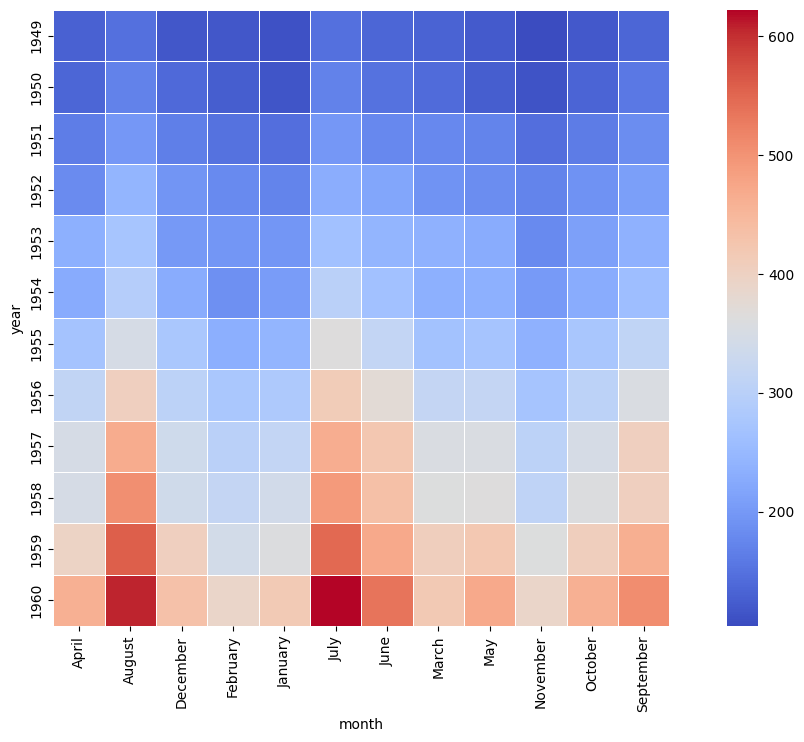

In [4]:
# Se puede personalizar más mediante parametros como:
# - cmap para la secuencia de colores
# - linewidths para marcar espaciado entre las celdas
# - square para generar una matriz cuadrada y no una que ocupe todo es espacio disponible
ax = sns.heatmap(dataset_vuelos, cmap='coolwarm', linewidths=.5, square=True)

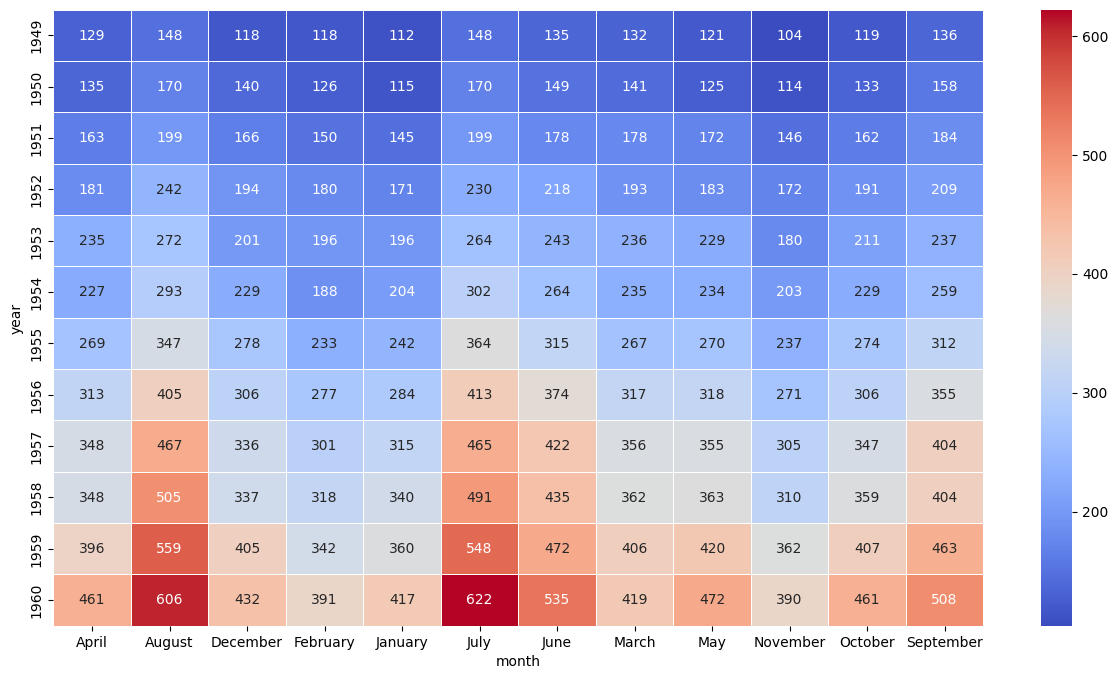

In [5]:
# Más aún, para anotar los valores de cada celda:
# - annot específica si se escribe o no el valor en la celda
# - fmt específica el formato de escritura del valor (d para valores enteros)
# - annot_kws específica argumentos para el texto de las anotaciones, como el tamaño
ax = sns.heatmap(dataset_vuelos, annot=True, fmt="d", annot_kws={'size':10}, cmap='coolwarm', linewidths=.5)

Para más detalles, puedes consultar las documentaciones de todas estas funciones:
- [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Mapa de densidad 2D y hexbin

# Cargar *dataset*

Este *dataset* contiene datos de pinguinos, es una buena alternativa para visualización.

In [13]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

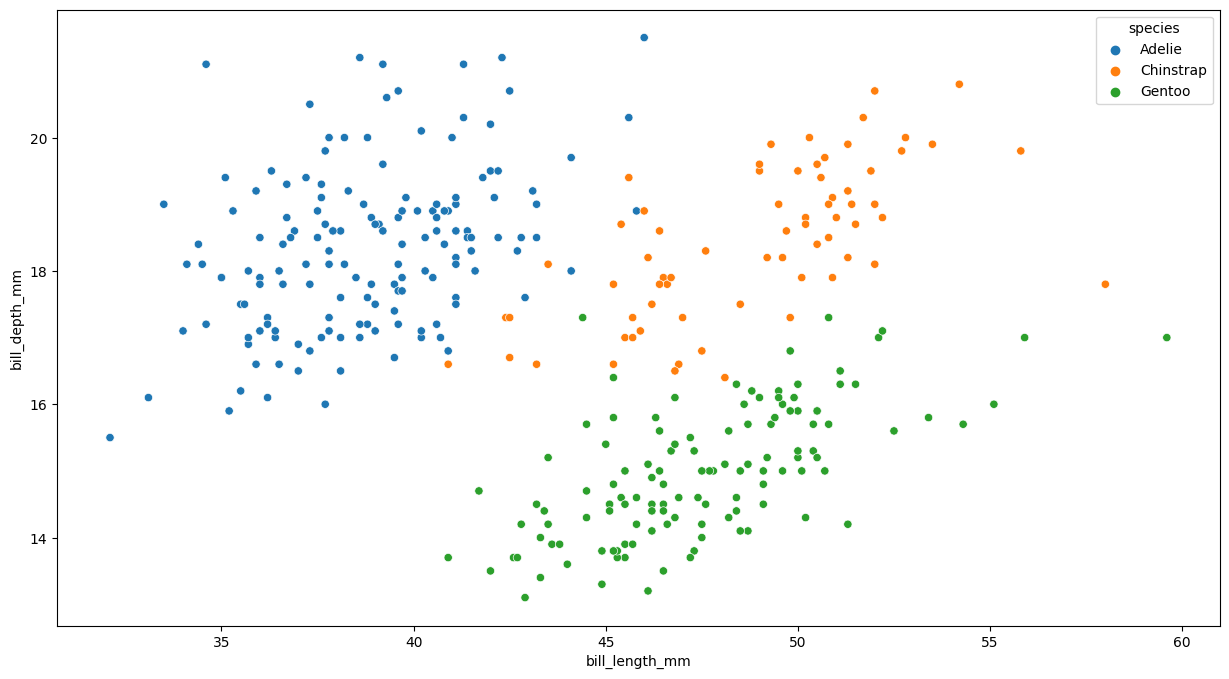

In [27]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

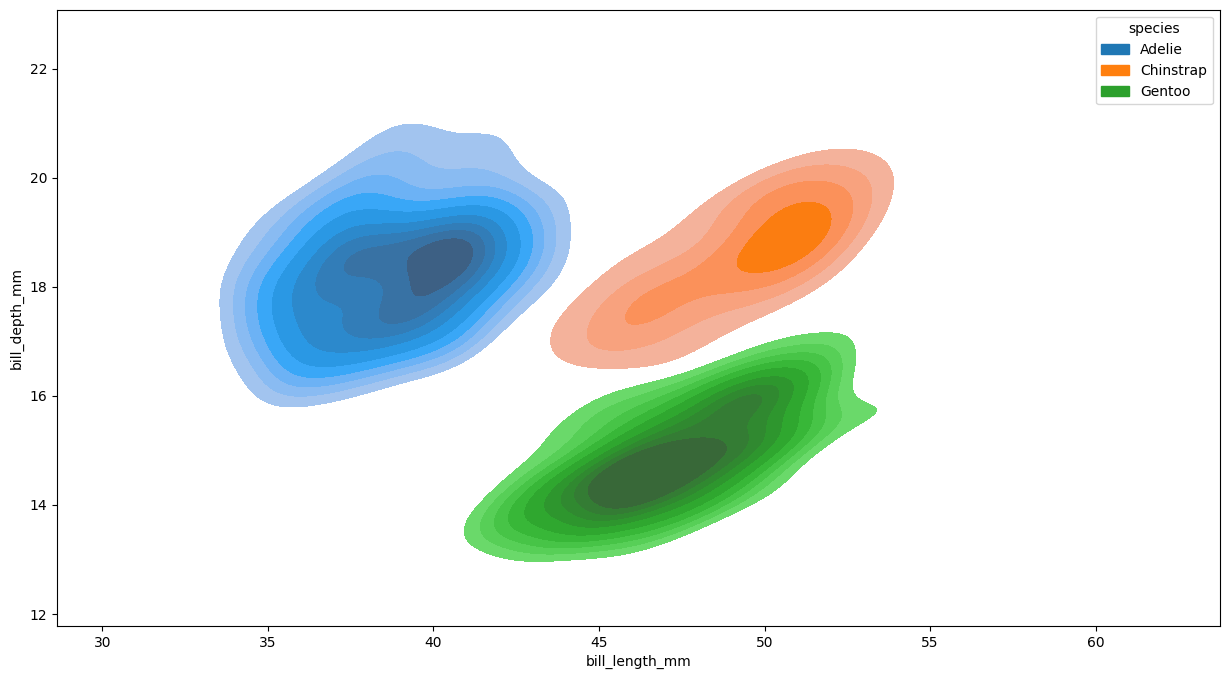

In [29]:
sns.kdeplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    levels=10,
    thresh=.2,
    fill=True,
)

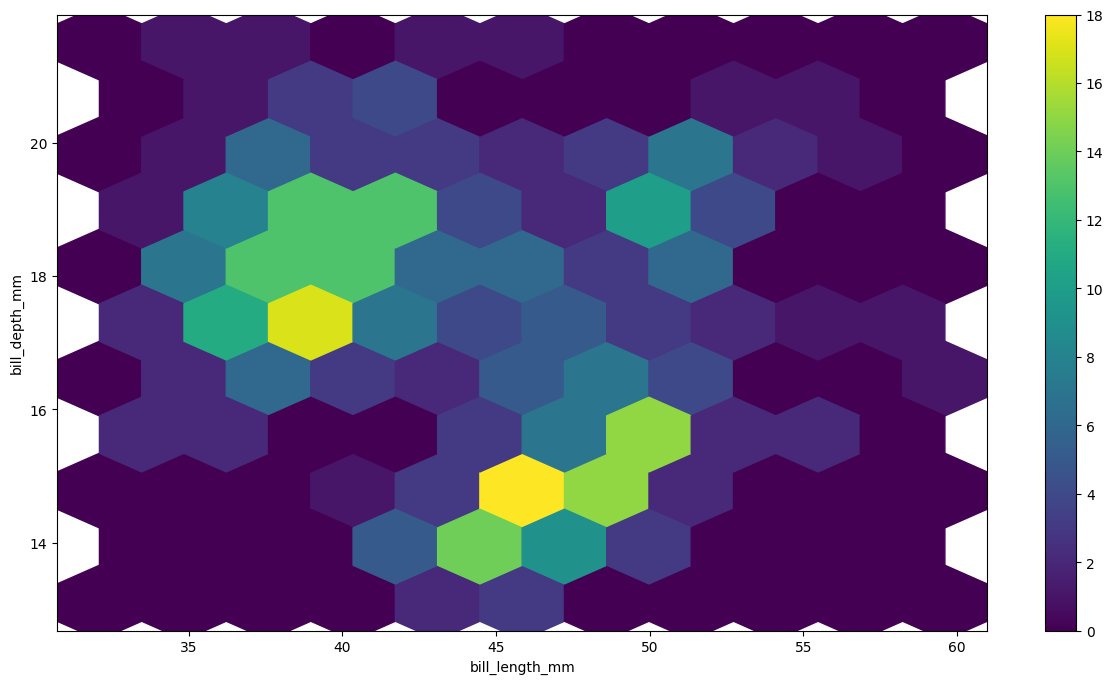

In [32]:
ax = penguins.plot.hexbin(x='bill_length_mm',
                    y='bill_depth_mm',
                    reduce_C_function=np.sum,
                    gridsize=10,
                    cmap="viridis")